In [1]:
from run_any_data import *

## Loading the data files

#### NOTE: to use the fitting function you need to provide the uncertainty for both x- and y-data (e.g. energy and flux).  For the uncertainty you can use for example 10% of the x and y data.
<br> provide the path to the file. The file can be in either txt or csv format. If the data is in xlsx format use pd.read_excel() instead of pd.read_csv()


In [2]:
#path_to_file = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/messenger/event1.txt'
path =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_LET_A_EnergySpectrum_withUncertainty.txt'
data = pd.read_csv(path) # or pd.read_excel() for xlsx data

path2 =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_HET_A_EnergySpectrum_withUncertainty.txt'
data2 = pd.read_csv(path2) # or pd.read_excel() for xlsx data



#### Choose what to fit. The file can contain all kinds of data and multiple columns etc. Below, you need to choose what you want to fit. Choose x-axis data and y-axis data. 

In [3]:
x_data = data['PSP/LET-A - Energy (MeV)'][:len(data)-2]
y_data = data['flux at 1-hour before shock'][:len(data)-2]
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err = data['PSP/LET-A - Energy: Delta Minus (MeV)'][:len(data)-2]
y_err = data['flux uncertainty at 1-hour before shock'][:len(data)-2]


In [4]:
x_data2 = data2['PSP/HET-A - Energy (MeV)']
y_data2 = data2['flux at 1-hour before shock']
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err2 = data2['PSP/LET-A - Energy: Delta Minus (MeV)']
y_err2 = data2['flux uncertainty at 1-hour before shock']


## Saving data 
#### You can choose to save the plot (savefig), the ODR run as a pickle file (save_pickle) and save all the variables from the fitting procedure (save_fit_variables) by setting the options below to True

In [5]:
savefig = False # save the fit
save_pickle = False # save a pickle file of the odr run
save_fit_variables = False # save the variables from the fit

In [6]:
data_for_the_fit = pd.DataFrame()
data_for_the_fit['x'] = x_data
data_for_the_fit['y'] = y_data
data_for_the_fit['x_err'] = x_err
data_for_the_fit['y_err'] = y_err

In [7]:
data_for_the_fit2 = pd.DataFrame()
data_for_the_fit2['x'] = x_data2
data_for_the_fit2['y'] = y_data2
data_for_the_fit2['x_err'] = x_err2
data_for_the_fit2['y_err'] = y_err2

In [8]:
plot_title = 'PSP spectrum - 1-hours before shock'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 

## INPUTS FOR THE FIT

### which_fit options: 
<br>'single' will force a single pl fit to the data
<br> 'broken' will force a broken pl fit to the data but ONLY if the break point is within the energy range otherwise a sigle pl fit will be produced instead
<br> 'best_sb' will choose automatically the best fit type between single and broken by comparing the redchis of the fits
<br> 'cut' will produce a single pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'broken_cut' will produce a broken pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'best_cb' will choose the better option between a broken pl and a single+cutoff. If the break and cutoff points are outside of the energy range a single pl will be fit instead.
<br>'triple' will try to fit a triple pl. If not possible, will try to fit the next best option.
<br> 'best' will choose automatically the best fit type by comparing the redchis of the fits


In [9]:
which_fit = 'best' 

## Guess values and energy range
#### NOTE: e_min, e_max, break_guess and cut_guess should bein MeV. e_min and e_max can also be None. In this case the MAKE_THE_FIT function will automaically choose the values. (energy on x-axis)

<br>Random and iterations
<br>if use_random = False the fit will only be made once with the guess values
<br> if use_random = True the fitting function will first create a list of reasonable values for each of the fitting parameters then randomly select values from the lists and compare the redchis of each fit to find the best one
<br> iterations = number of times the fit is retried to find the best one

In [13]:
e_min =  None # in MeV 
e_max = None# in MeV

g1_guess = -1.9 # gamma 1 -> spectral index before the break (or single pl)
g2_guess = -2.5 # gamma 2 -> spectral index after the break (for broken pl)
g3_guess = -4.5 # gamma 3 -> spectral index after the second break (for triple pl)
c1_guess = 1e3 # peak flux
alpha_guess = 7.16 # sharpness of the first break
beta_guess = 10 #sharpness of the second break
break_guess_low = 2 #in MeV
break_guess_high = 10
cut_guess = 10 #in MeV

#legend_details = False

use_random = True 
iterations = 20

plot_title = 'BepiColombo spectrum - at shock arrival'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 


In [14]:
data_list = [data_for_the_fit, data_for_the_fit2]
for i in range(len(data_list)):
    print(i)

0
1


            x             y   x error    y error
0    2.181017  4.241339e+03  0.197399  36.592220
1    2.593681  2.680537e+03  0.234748  26.664070
2    3.084424  1.270063e+03  0.279164  16.817950
3    3.668019  6.028743e+02  0.331984  10.638410
4    4.362035  2.960812e+02  0.394798   6.832833
5    5.187363  1.596564e+02  0.469496   4.601624
6    6.168849  1.010598e+02  0.558329   3.355910
7    7.336039  6.336093e+01  0.663968   2.437279
8    8.724070  5.180991e+01  0.789596   2.056201
9   10.374730  4.487754e+01  0.938993   1.925226
10  12.337700  3.745778e+01  1.116657   1.619994
11  14.672080  2.840935e+01  1.327937   1.294290
12  17.448140  1.956871e+01  1.579191   0.985944
13  20.749450  1.256712e+01  1.877986   0.726469
14  24.675390  8.792191e+00  2.233314   0.558756
15  29.344150  4.761448e+00  2.655873   0.483029
16  12.337700  3.943411e+01  1.116657   0.549503
17  14.672080  2.388288e+01  1.327937   0.399550
18  17.448140  1.427612e+01  1.579191   0.294558
19  20.749450  1.139

/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: overflow encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: invalid value encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: overflow encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_bre

{'single': 2.5143358349163507, 'cut': 2.5143359339155293, 'broken': 2.873528781698763, 'broken_cut': 3.018897656243855, 'triple': 3.3524496807968567}
Smallest chis value single


/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:43: RuntimeWarning: invalid value encountered in multiply
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:43: RuntimeWarning: divide by zero encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)


{'triple': 0.27155238124846703, 'single': 2.5143358349025333, 'cut': 2.514336356624353, 'broken': 2.8735321631751813, 'broken_cut': 3.020150424786756}
Smallest chis value triple
TRIPLE
[ 3.63569989  3.22303589  2.73229289  2.14869789  1.45468189  0.62935389
  0.35213211  1.51932211  2.90735311  4.55801311  6.52098311  8.85536311
 11.63142311 14.93273311 18.85867311 23.52743311  6.52098311  8.85536311
 11.63142311 14.93273311 18.85867311 23.52743311 29.07956311 35.68218311
 43.53407311 52.87159311]
6
5.6105205
8.0000073
2.3894868000000002
0.00989674288981135
TRIPLE
[ 3.63569989  3.22303589  2.73229289  2.14869789  1.45468189  0.62935389
  0.35213211  1.51932211  2.90735311  4.55801311  6.52098311  8.85536311
 11.63142311 14.93273311 18.85867311 23.52743311  6.52098311  8.85536311
 11.63142311 14.93273311 18.85867311 23.52743311 29.07956311 35.68218311
 43.53407311 52.87159311]
6
5.6105205
8.0000073
2.3894868000000002
0.00989674288981135


/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:140: RuntimeWarning: overflow encountered in multiply
  y = c1*(x/0.1)**gamma1 *np.exp(-(x/E_cut)**2)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:202: RuntimeWarning: overflow encountered in power
  return c1*x**gamma1


{'triple': 0.2761211424972446, 'single': 2.5143358350049176, 'cut': 2.514335853977532, 'broken': 2.873529950036521, 'broken_cut': 3.024731294557092}
Smallest chis value triple
TRIPLE
[ 3.5107002  3.0980362  2.6072932  2.0236982  1.3296822  0.5043542
  0.4771318  1.6443218  3.0323528  4.6830128  6.6459828  8.9803628
 11.7564228 15.0577328 18.9836728 23.6524328  6.6459828  8.9803628
 11.7564228 15.0577328 18.9836728 23.6524328 29.2045628 35.8071828
 43.6590728 52.9965928]
6
5.6105205
8.0000073
2.3894868000000002
0.014176780727934712
TRIPLE
[ 3.5107002  3.0980362  2.6072932  2.0236982  1.3296822  0.5043542
  0.4771318  1.6443218  3.0323528  4.6830128  6.6459828  8.9803628
 11.7564228 15.0577328 18.9836728 23.6524328  6.6459828  8.9803628
 11.7564228 15.0577328 18.9836728 23.6524328 29.2045628 35.8071828
 43.6590728 52.9965928]
6
5.6105205
8.0000073
2.3894868000000002
0.014176780727934712


/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:111: RuntimeWarning: invalid value encountered in double_scalars
  y = c1*(x/0.1)**gamma1 * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)*np.exp(-(x/E_cut)**2)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:43: RuntimeWarning: overflow encountered in multiply
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:202: RuntimeWarning: overflow encountered in multiply
  return c1*x**gamma1


{'triple': 0.26402947928402587, 'single': 2.5143358349199407, 'cut': 2.514336711235989, 'broken': 2.8735298193404737, 'broken_cut': 3.0208062577038}
Smallest chis value triple
TRIPLE
[ 3.85375605  3.44109205  2.95034905  2.36675405  1.67273805  0.84741005
  0.13407595  1.30126595  2.68929695  4.33995695  6.30292695  8.63730695
 11.41336695 14.71467695 18.64061695 23.30937695  6.30292695  8.63730695
 11.41336695 14.71467695 18.64061695 23.30937695 28.86150695 35.46412695
 43.31601695 52.65353695]
6
5.6105205
8.0000073
2.3894868000000002
0.0032745981777626554
TRIPLE
[ 3.85375605  3.44109205  2.95034905  2.36675405  1.67273805  0.84741005
  0.13407595  1.30126595  2.68929695  4.33995695  6.30292695  8.63730695
 11.41336695 14.71467695 18.64061695 23.30937695  6.30292695  8.63730695
 11.41336695 14.71467695 18.64061695 23.30937695 28.86150695 35.46412695
 43.31601695 52.65353695]
6
5.6105205
8.0000073
2.3894868000000002
0.0032745981777626554
{'triple': 0.2712383792991395, 'single': 2.51433

/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: invalid value encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:111: RuntimeWarning: divide by zero encountered in power
  y = c1*(x/0.1)**gamma1 * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)*np.exp(-(x/E_cut)**2)


{'single': 2.5143358350502427, 'cut': 2.5143363675640495, 'broken': 2.8735290157232716, 'broken_cut': 3.0195064906986637, 'triple': 3.352454227360926}
Smallest chis value single


/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:111: RuntimeWarning: overflow encountered in multiply
  y = c1*(x/0.1)**gamma1 * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)*np.exp(-(x/E_cut)**2)


{'triple': 0.2710608984152984, 'single': 2.514335835041524, 'cut': 2.5143363201771094, 'broken': 2.8735311063787856, 'broken_cut': 3.0203790208361267}
Smallest chis value triple
TRIPLE
[ 3.64944236  3.23677836  2.74603536  2.16244036  1.46842436  0.64309636
  0.33838964  1.50557964  2.89361064  4.54427064  6.50724064  8.84162064
 11.61768064 14.91899064 18.84493064 23.51369064  6.50724064  8.84162064
 11.61768064 14.91899064 18.84493064 23.51369064 29.06582064 35.66844064
 43.52033064 52.85785064]
6
5.6105205
8.0000073
2.3894868000000002
0.009448514193317159
TRIPLE
[ 3.64944236  3.23677836  2.74603536  2.16244036  1.46842436  0.64309636
  0.33838964  1.50557964  2.89361064  4.54427064  6.50724064  8.84162064
 11.61768064 14.91899064 18.84493064 23.51369064  6.50724064  8.84162064
 11.61768064 14.91899064 18.84493064 23.51369064 29.06582064 35.66844064
 43.52033064 52.85785064]
6
5.6105205
8.0000073
2.3894868000000002
0.009448514193317159
{'single': 2.514335835077364, 'cut': 2.514336513

/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:43: RuntimeWarning: invalid value encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)


{'triple': 0.2867682054923133, 'single': 2.5143358348978837, 'cut': 2.5143366000293286, 'broken': 2.873526691565706, 'broken_cut': 3.0210346757043043}
Smallest chis value triple
TRIPLE
[ 3.23420971  2.82154571  2.33080271  1.74720771  1.05319171  0.22786371
  0.75362229  1.92081229  3.30884329  4.95950329  6.92247329  9.25685329
 12.03291329 15.33422329 19.26016329 23.92892329  6.92247329  9.25685329
 12.03291329 15.33422329 19.26016329 23.92892329 29.48105329 36.08367329
 43.93556329 53.27308329]
5
4.717866600000001
6.7271775
2.009310899999999
0.02504292705069666
TRIPLE
[ 3.23420971  2.82154571  2.33080271  1.74720771  1.05319171  0.22786371
  0.75362229  1.92081229  3.30884329  4.95950329  6.92247329  9.25685329
 12.03291329 15.33422329 19.26016329 23.92892329  6.92247329  9.25685329
 12.03291329 15.33422329 19.26016329 23.92892329 29.48105329 36.08367329
 43.93556329 53.27308329]
5
4.717866600000001
6.7271775
2.009310899999999
0.02504292705069666
{'triple': 0.2673150522449463, 'sing

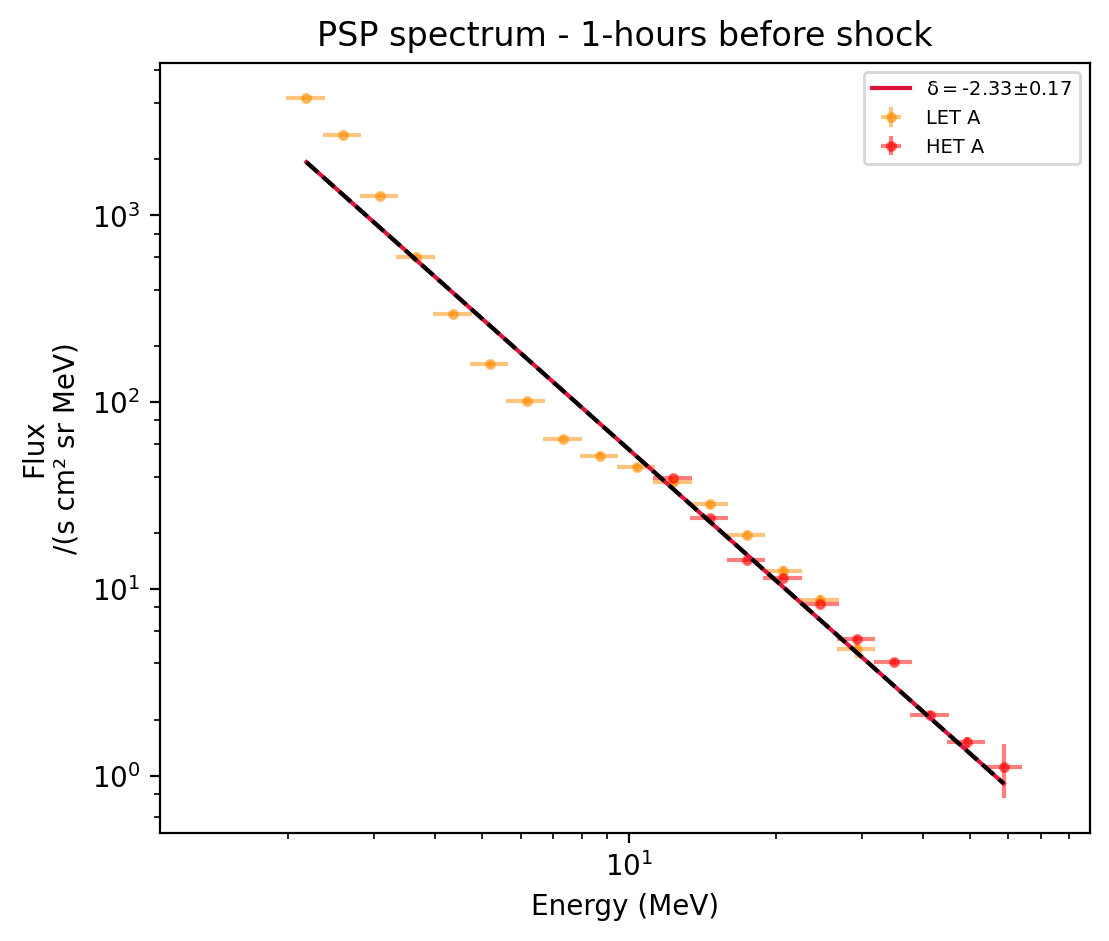

In [15]:
run_all(path, data_list, savefig = True, plot_title = plot_title, x_label = x_label, y_label = y_label, legend_title = legend_title, data_label_for_legend = ['LET A', 'HET A'], which_fit = 'best', e_min = e_min, e_max = e_max)
